<a href="https://colab.research.google.com/github/Rojan116/NepaliHandWrittenAlphabetRecognizer/blob/master/own_dataset_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!git clone https://github.com/Rojan116/NepaliHandWrittenAlphabetRecognizer.git

Cloning into 'NepaliHandWrittenAlphabetRecognizer'...
remote: Enumerating objects: 1827, done.
remote: Counting objects: 100% (1827/1827), done.
remote: Compressing objects: 100% (1825/1825), done.
remote: Total 99358 (delta 2), reused 1826 (delta 2), pack-reused 97531
Receiving objects: 100% (99358/99358), 137.61 MiB | 8.46 MiB/s, done.
Resolving deltas: 100% (1552/1552), done.
Checking out files: 100% (93803/93803), done.


In [15]:
ls

augmented_cnn_36_class.ipynb   nepalibarna/
augmented_cnn.ipynb            NepaliHandWrittenAlphabetRecognizer/
augmented_cnn_predicted.ipynb  new_cnn_9766_acc.ipynb
cnn_98_.ipynb                  new_cnn_98%.ipynb
CNN.ipynb                      new_cnn.ipynb
custom_model.ipynb             new_cnn_may14.ipynb
dev.py                         new_cnn_may15.ipynb
dhrcdata/                      new_cnn_may16.ipynb
image_augmentation.ipynb       Untitled.ipynb


In [16]:
cd NepaliHandWrittenAlphabetRecognizer

/content/NepaliHandWrittenAlphabetRecognizer/NepaliHandWrittenAlphabetRecognizer


In [17]:
ls

augmented_cnn_36_class.ipynb   dev.py                    new_cnn.ipynb
augmented_cnn.ipynb            dhrcdata/                 new_cnn_may14.ipynb
augmented_cnn_predicted.ipynb  image_augmentation.ipynb  new_cnn_may15.ipynb
cnn_98_.ipynb                  nepalibarna/              new_cnn_may16.ipynb
CNN.ipynb                      new_cnn_9766_acc.ipynb    Untitled.ipynb
custom_model.ipynb             new_cnn_98%.ipynb


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tqdm import tqdm
import random
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

In [0]:
PATH = os.getcwd()
DATADIR = PATH + '/nepalibarna'		
train_data_path = PATH + '/nepalibarna'
test_data_path = PATH + '/nepalibarna'


In [24]:
#counting categories
new_cat = []
for x in os.listdir(train_data_path):
  new_cat.append(x)

print(new_cat)  
classes = np.unique(new_cat)
print(len(classes))


['character_22_pha', 'character_14_dha', 'character_33_ha', 'character_31_sa', 'character_17_tha', 'character_15_na', 'character_28_la', 'character_01_ka', 'character_05_n..a', 'character_03_ga', 'character_21_pa', 'character_19_dha', 'character_13_da', 'character_34_chyan', 'character_09_jha', 'character_04_gha', 'character_30_sa', 'character_36_gyan', 'character_07_chha', 'character_20_na', 'character_12_tha', 'character_26_ya', 'character_08_ja', 'character_16_ta', 'character_27_ra', 'character_25_ma', 'character_29_wa', 'character_11_ta', 'character_18_da', 'character_24_bha', 'character_23_ba', 'character_02_kha', 'character_32_sa', 'character_06_cha', 'character_35_tra', 'character_10_yaa']
36


In [0]:
CATEGORIES = [

"character_01_ka","character_02_kha","character_03_ga","character_04_gha","character_05_n..a",
"character_06_cha","character_07_chha","character_08_ja","character_09_jha","character_10_yaa",
"character_11_ta","character_12_tha","character_13_da","character_14_dha","character_15_na",
"character_16_ta","character_17_tha","character_18_da","character_19_dha","character_20_na","character_21_pa",
"character_22_pha","character_23_ba","character_24_bha","character_25_ma","character_26_ya","character_27_ra",
"character_28_la","character_29_wa","character_30_sa","character_31_sa","character_32_sa",
"character_33_ha","character_34_chyan","character_35_tra","character_36_gyan"

]


In [0]:
IMG_SIZE = 32
training_data = []
testing_data = []

def create_training_data():
  for catagory in CATEGORIES:
    path = os.path.join(train_data_path, catagory)
    class_num = CATEGORIES.index(catagory)
    for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          training_data.append([new_array,class_num])
        except Exception as e:
          pass




create_training_data()


In [34]:
#shuffle training data for trainning diff image set in every batch
random.shuffle(training_data)

#hot encode image dataset

train_x = []
train_y = []


#seperating features and labels from list
for features, labels in training_data:
	train_x.append(features)
	train_y.append(labels)


#converting list to array
train_y_array = np.array(train_y)

#converting image dataset to input 32*32 dataset 

train_image_array = np.array(train_x).reshape(-1,32,32,1)

#counting total number of class in dataset
classes = np.unique(train_y_array)
print(classes)
print("total number of class={} ".format(len(classes)))



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
total number of class=36 


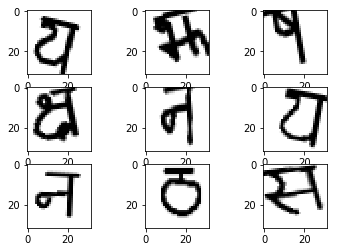

In [36]:
# convert from int to float
x_train = train_image_array.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                              zoom_range=0.2
                            )
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, train_y, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(32, 32), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

In [0]:

#one hot enoded class 
train_y = to_categorical(train_y_array)


train_y = np.array(train_y)

#all train x, y and test x y are in array form now


In [38]:
#new model

# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(36, activation = "softmax"))

# Define the optimizer
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = Adam(lr=0.0001)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

#model.summary()

history = model.fit(x=train_image_array,y=train_y,epochs=20,batch_size=100, validation_split=0.3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1251 samples, validate on 537 samples
Epoch 1/20
1251/1251 [==============================] - 6s 5ms/step - loss: 15.1417 - acc: 0.0304 - val_loss: 14.5671 - val_acc: 0.0242
Epoch 2/20
1251/1251 [==============================] - 0s 164us/step - loss: 14.9515 - acc: 0.0344 - val_loss: 12.4449 - val_acc: 0.0354
Epoch 3/20
1251/1251 [==============================] - 0s 162us/step - loss: 14.4342 - acc: 0.0408 - val_loss: 8.8655 - val_acc: 0.0745
Epoch 4/20
1251/1251 [==============================] - 0s 156us/step - loss: 12.6343 - acc: 0.0448 - val_loss: 4.6575 - val_acc: 0.0875
Epoch 5/20
1251/1251 [==============================] - 0s 158us/step - loss: 6.2508 - acc: 0.0568 - val_loss: 3.5101 - val_acc: 0.0670
Epoch 6/20
1251/1251 [============

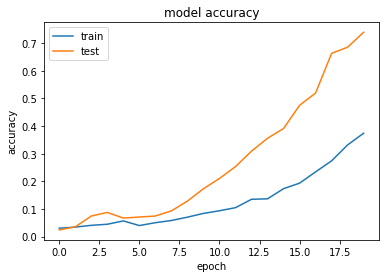

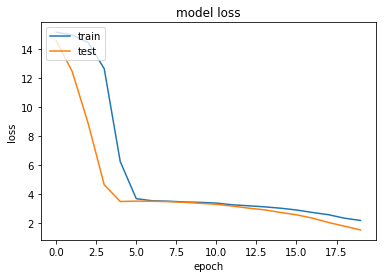

In [39]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
img = train_x[500].reshape(-1,32,32,1)
belongs_to_class = train_y[500]

In [43]:
print(img.shape)

(1, 32, 32, 1)


In [0]:
x = model.predict(img)

In [45]:
print(x)

[[0.01382816 0.01377816 0.0045843  0.01904106 0.15585573 0.00206233
  0.01892174 0.00471483 0.02681716 0.00823716 0.01493545 0.00955976
  0.3003277  0.05339213 0.00194533 0.00567723 0.02937835 0.03095538
  0.01612666 0.00393626 0.00966468 0.01471926 0.01413449 0.00734408
  0.02236115 0.03143315 0.01652023 0.01559718 0.00871305 0.01259963
  0.01066462 0.01432278 0.02847598 0.04134345 0.01430448 0.00372703]]


In [0]:
name = CATEGORIES[np.argmax(x)]
bc = CATEGORIES[np.argmax(belongs_to_class)]

predicted image is of: character_13_da with accuracy 73.0
Actual class label is: character_13_da


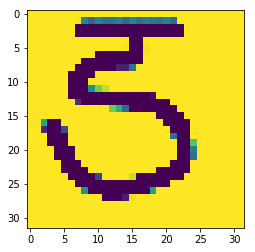

In [48]:
%matplotlib inline
imgplot = plt.imshow(train_x[500])
i=np.argmax(history.history['acc'])
acc= history.history['val_acc'][19]
acc= acc*100
acc = np.trunc(acc)

print("predicted image is of: {} with accuracy {}".format(name,acc))
print("Actual class label is: {}".format(bc))



0.9821350877710937
